In [ ]:
#pip install boto3 fastavro

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: c:\Users\henri\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [ ]:
#run in cmd after AWS CLI installation
#aws configure set aws_access_key_id "your_key"
#aws configure set aws_secret_access_key "your_key

"aws" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"aws" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
#Data Bucket URL s3://empatica-us-east-1-prod-data/v2/1932/
#in shell:
# export AWS_ACCESS_KEY_ID="your_key
# export AWS_SECRET_ACCESS_KEY="your_key"
#Access Key your_key
#Secret Key your_key

## get this keys from https://carelab.empatica.com/ -> data access keys, check if it's ok
aws_access_key_id = 'your_key'
aws_secret_access_key = 'your_key'
region_name = 'us-east-1'


######### Don't change this! ##########
# Create the S3 resource with the same credentials
s3_resource = boto3.resource(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name=region_name
)

# Bucket and prefix
BUCKET_NAME = "empatica-us-east-1-prod-data"
PREFIX = "v2/1932/"

# Access the bucket
bucket = s3_resource.Bucket(BUCKET_NAME)

# List objects
for obj in bucket.objects.filter(Prefix=PREFIX):
    print(obj.key)

v2/1932/1/1/metadata/1-1-00000000_metadata.csv
v2/1932/1/1/metadata/1-1-00000001_metadata.csv
v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/digital_biomarkers/aggregated_per_minute/1-1-00000000_2025-04-05_accelerometers-std.csv
v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/digital_biomarkers/aggregated_per_minute/1-1-00000000_2025-04-05_acticounts.csv
v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/digital_biomarkers/aggregated_per_minute/1-1-00000000_2025-04-05_actigraphy-counts.csv
v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/digital_biomarkers/aggregated_per_minute/1-1-00000000_2025-04-05_activity-classification.csv
v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/digital_biomarkers/aggregated_per_minute/1-1-00000000_2025-04-05_activity-counts.csv
v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/digital_biomarkers/aggregated_per_minute/1-1-00000000_2025-04-05_activity-intensity.csv
v2/1932/1/1/participant_d

In [6]:
OBJECT_KEY = "v2/1932/1/1/participant_data/2025-04-05/00000000-3YK9J1H19W/raw_data/v6/1-1-00000000_1743812661.avro"

# Local file path to save
LOCAL_FILENAME = "downloaded_file.avro"

# Download the file
s3_resource.Bucket(BUCKET_NAME).download_file(OBJECT_KEY, LOCAL_FILENAME)

print("File downloaded as:", LOCAL_FILENAME)

File downloaded as: downloaded_file.avro


In [12]:
from fastavro import reader

with open("downloaded_file.avro", "rb") as file:
    avro_reader = reader(file)
    records = [record for record in avro_reader]  # load all records into a list

# Preview the first record
print(records[0])

{'schemaVersion': {'major': 6, 'minor': 4, 'patch': 1}, 'fwVersion': {'major': 4, 'minor': 37, 'patch': 2}, 'hwVersion': {'major': 6, 'minor': 0, 'patch': 2}, 'algoVersion': {'major': 11, 'minor': 8, 'patch': 0}, 'timezone': -10800, 'enrollment': {'participantID': '00000000', 'siteID': '1', 'studyID': '1', 'organizationID': '1932'}, 'deviceSn': '3YK9J1H19W', 'deviceModel': 'EMBRACEPLUS', 'rawData': {'accelerometer': {'timestampStart': 1743812661589443, 'samplingFrequency': 64.056884765625, 'imuParams': {'physicalMin': -16, 'physicalMax': 16, 'digitalMin': -32768, 'digitalMax': 32768}, 'x': [548, 539, 528, 544, 525, 527, 539, 542, 571, 545, 562, 553, 568, 562, 547, 563, 555, 567, 572, 584, 575, 534, 537, 530, 547, 564, 557, 558, 564, 556, 572, 588, 590, 567, 561, 555, 550, 552, 567, 556, 556, 562, 557, 558, 547, 543, 553, 567, 578, 560, 574, 553, 561, 569, 556, 543, 545, 549, 552, 544, 571, 550, 552, 541, 518, 559, 548, 543, 567, 548, 554, 544, 555, 557, 576, 572, 552, 542, 555, 566, 55

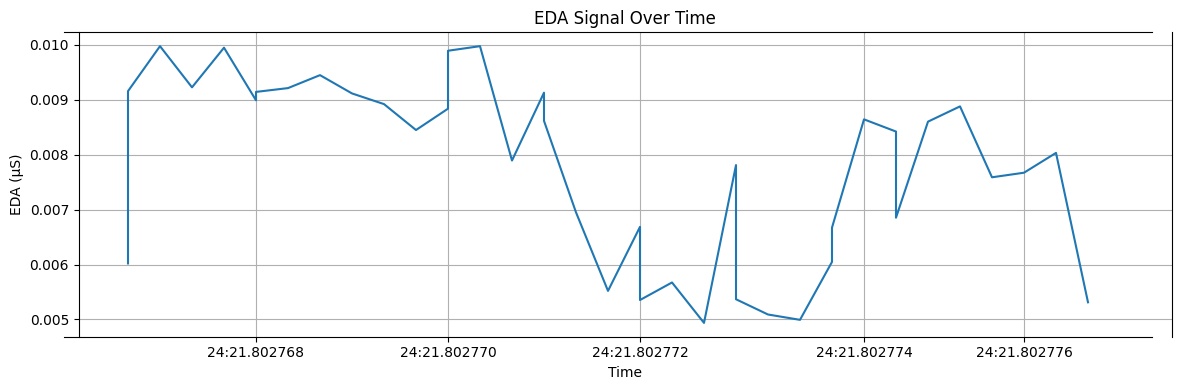

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Assuming you've already done:
# records = [record for record in fastavro.reader(open(...))]

eda = records[0]['rawData']['eda']
values = eda['values']
sampling_freq = eda['samplingFrequency']
timestamp_start = eda['timestampStart']

timestamp_start = float(timestamp_start)
# Convert start timestamp to datetime (check if it's in ms or s)
start_time = pd.to_datetime(timestamp_start*1000-3600*5*1000)

# Create time axis using sampling frequency
n_samples = len(values)
time_deltas = pd.to_timedelta(np.arange(n_samples) / sampling_freq*1000)
time_axis = start_time + time_deltas

# Quick line plot
plt.figure(figsize=(12, 4))
plt.plot(time_axis, values)
plt.title("EDA Signal Over Time")
plt.xlabel("Time")
plt.ylabel("EDA (µS)")
plt.grid(True)
plt.tight_layout()
plt.show()